##  Machine Learning with Penguins

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree


### Import the dataset from Seaborn
- get rid of the missing variables
- check the variable names 

In [42]:
penguins = sns.load_dataset("penguins")
penguins.dropna(inplace=True)
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

## Let's plot the data and think about it as a classifier

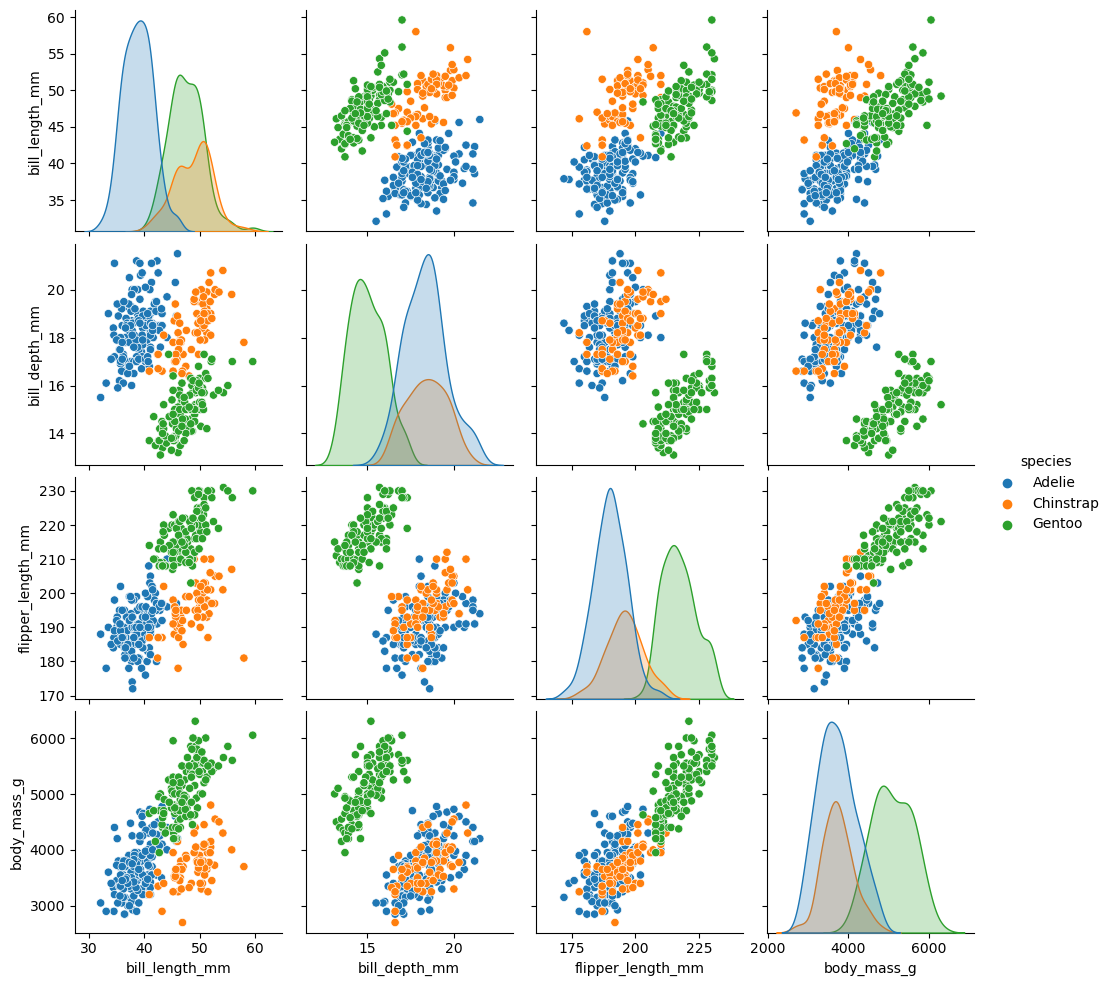

In [30]:
sns.pairplot(data=penguins, hue="species")


### Set up the model - lets predict the species of penguin based on measurements of the bill, the flipper and and the body mass
- select the features / columns for the model

In [31]:
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species']

###  Set up the testing and training subsets of the data 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Shape of Training data X",X_train.shape)
print("Shape of Testing data X",X_test.shape)
print("Train data y_train.shape", y_train.shape)



Shape of Training data X (266, 4)
Shape of Testing data X (67, 4)
Train data y_train.shape (266,)


###  Let's start out with a k-nearest neighbors classifier

In [54]:
k = 5 # we choose k=5 for this example - feel free to change it and see how it affects the results
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

 - We fit a model but didn't get much output yet! 
 - Lets put the model to work on the Xs that we saved out
 - And save those results as Predicted Y 

In [55]:
y_pred_knn = knn.predict(X_test)


Now we can ask for some scored on how the Predicted Y compares to the Y that we saved to the test dataset
- Score is comparing $Y_{test} $ to $Y_{Pred}$

Accuracy Score

In [56]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.2f}")

Accuracy: 0.82


Confusion Matrix

In [57]:

confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(confusion_matrix_knn)

[[25  2  4]
 [ 5  8  0]
 [ 0  1 22]]


Classification Report

In [58]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

      Adelie       0.83      0.81      0.82        31
   Chinstrap       0.73      0.62      0.67        13
      Gentoo       0.85      0.96      0.90        23

    accuracy                           0.82        67
   macro avg       0.80      0.79      0.79        67
weighted avg       0.82      0.82      0.82        67



## Let's start over and do it again for Decision Tree 

In [10]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt_fit = clf_dt.fit(X_train, y_train)

In [14]:
y_pred_dt = clf_dt_fit.predict(X_test)
accuracy_clf_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_clf_dt:.2f}")

Accuracy: 0.99


In [17]:
confusion_matrix_clf_dt = confusion_matrix(y_test, y_pred_dt)
print(confusion_matrix_clf_dt)

[[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]


In [59]:
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



And with Decision Trees - we can get a visualization for the decision tree

[Text(0.640625, 0.9375, 'x[2] <= 206.5\ngini = 0.64\nsamples = 266\nvalue = [115, 55, 96]'),
 Text(0.46875, 0.8125, 'x[0] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113, 50, 1]'),
 Text(0.3125, 0.6875, 'x[0] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.1875, 0.5625, 'x[1] <= 16.7\ngini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.125, 0.4375, 'x[0] <= 39.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.0625, 0.3125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.1875, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.4375, 'gini = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.4375, 0.5625, 'x[1] <= 17.9\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.375, 0.4375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.5, 0.4375, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.625, 0.6875, 'x[3] <= 4100.0\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
 Text(0.5625, 0.5625, 'gini = 0.0\nsamp

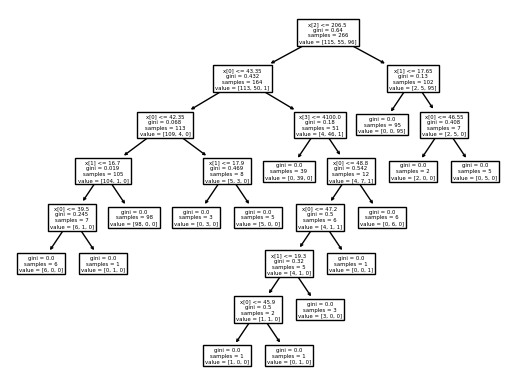

In [19]:
tree.plot_tree(clf_dt)

### And now let's try Support Vector Machine

In [60]:
from sklearn.svm import SVC
svc = SVC()

In [69]:
svc.fit(X_train, y_train)
print('Accuracy', svc.score(X_test, y_test))
print( confusion_matrix(y_test, y_pred_dt))
print(metrics.classification_report(y_test, y_pred_dt))

Accuracy 0.7313432835820896
[[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



In [70]:
# one hot encoding for island
penguins = pd.get_dummies(penguins, columns=['island'], prefix = ['island'])
penguins.head()


species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie            39.1           18.7              181.0       3750.0   
1  Adelie            39.5           17.4              186.0       3800.0   
2  Adelie            40.3           18.0              195.0       3250.0   
4  Adelie            36.7           19.3              193.0       3450.0   
5  Adelie            39.3           20.6              190.0       3650.0   

      sex  island_Biscoe  island_Dream  island_Torgersen  
0    Male              0             0                 1  
1  Female              0             0                 1  
2  Female              0             0                 1  
4  Female              0             0                 1  
5    Male              0             0                 1